In [ ]:
#Logistic Regression-BlueOrRed

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Suppress warning messages
import warnings
warnings.filterwarnings("ignore")

In [4]:
mydata=pd.read_csv("BlueOrRed.csv")
mydata.info()
mydata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Undecided      10000 non-null  int64  
 1   Age            10000 non-null  int64  
 2   HomeOwner      10000 non-null  int64  
 3   Female         10000 non-null  int64  
 4   Married        10000 non-null  int64  
 5   HouseholdSize  10000 non-null  int64  
 6   Income         10000 non-null  float64
 7   Education      10000 non-null  int64  
 8   Church         10000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,51,1,1,1,4,171.0,15,0
1,1,37,1,1,1,3,96.0,18,0
2,1,53,1,1,1,6,86.0,20,0
3,0,33,1,1,1,2,176.0,18,1
4,0,46,1,1,1,6,420.0,15,1


In [5]:
# Calculate baseline proportion of Y variable
mydata['Undecided'].value_counts()

0    5986
1    4014
Name: Undecided, dtype: int64

In [6]:
Y=mydata.iloc[:,0:1]
X=mydata.iloc[:,1:9]
Y.head()

,Undecided
0,1
1,1
2,1
3,0
4,0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.head()
Y_train.head()
X_train["Undecided"]=Y_train
print(X_train.head())
X_test.head()

      Age  HomeOwner  Female  Married  HouseholdSize  Income  Education  \
9069   60          1       1        1              2    65.0         20   
2603   30          0       1        1              2    27.0          9   
7738   35          1       1        1              3   305.0         15   
1579   56          1       1        1              5    39.0         16   
5058   50          1       1        1              2     6.0          9   

      Church  Undecided  
9069       0          1  
2603       0          0  
7738       1          0  
1579       1          1  
5058       0          0  


,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
6252,50,1,1,0,6,62.0,20,0
4684,38,1,0,0,1,70.0,8,0
1731,38,1,1,1,5,65.5,18,0
4742,36,1,0,1,4,199.0,15,0
4521,55,0,0,1,2,78.0,8,0


In [8]:
#Build the logistic regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf
logit_train=smf.logit("Undecided~Age+HomeOwner+Female+Married+HouseholdSize+Income+Education+Church",data=X_train)
lg=logit_train.fit() 
lg.summary()

Optimization terminated successfully.
         Current function value: 0.526372
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Undecided   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6991
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Feb 2022   Pseudo R-squ.:                  0.2200
Time:                        10:41:54   Log-Likelihood:                -3684.6
converged:                       True   LL-Null:                       -4724.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.7707      0.201    -18.753      0.000      -4.165      -3.377
Age              -0.0133      0.003     -4.806      0.000      -0.019      -0.008
HomeOwner         0.5225      0.088      5.959      0.000       0.351       0.694
Female            1.1589      0.076     15.307      0.000       1.011       1.307
Married           0.2114      0.077      2.731      0.006       0.060       0.363
HouseholdSize     0.1821      0.021      8.620      0.000       0.141       0.223
Income           -0.0060      0.000    -13.029      0.000      -0.007      -0.005
Education         0.2097      0.008     25.222      0.000       0.193       0.226
Church           -1.6739      0.059    -28.135      0.000      -1.791      -1.557
=================================================================================
"""

In [9]:
#P-value of the overall model
lg.llr_pvalue

0.0

In [ ]:
#Interpretation: The Loglikelyhood ratio is overwhelmingly significant(If you fix alpha = 0.05)
#So, we can build logistic regression model based on the input variables for this case study.

In [10]:
#Calculating gain
Gain = lg.llf-lg.llnull
G2Stat = Gain *2

print("Gain =",Gain, "G2Stat =",G2Stat)

Gain = 1039.5319926962507 G2Stat = 2079.0639853925013


In [11]:
#Calculating McFadden R2
McFaddenR2 = 1-(lg.llf/lg.llnull)
print("McFaddenR2 = ", McFaddenR2)

McFaddenR2 =  0.22004689961146584


In [ ]:
#Interpretation of McFadden Rsq 22.00% of the uncertainty 
#produced by the intercept only model is 
#explained by the full model**. The fit is pretty good.

In [12]:
# Individual coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.4f}'.format
lgcoef

,coef,pval
Intercept,-3.7707,0.0000
Age,-0.0133,0.0000
HomeOwner,0.5225,0.0000
Female,1.1589,0.0000
Married,0.2114,0.0063
HouseholdSize,0.1821,0.0000
Income,-0.0060,0.0000
Education,0.2097,0.0000
Church,-1.6739,0.0000


In [ ]:
#Interpretation: At 5% level of significance, PValues for all Betas show that  they are overwhelmingly significant 
#implying all Betas are present in the model and they are definitely non-zero. The model based on trianing data is robust

In [13]:
#Exponential of coef to get odds ratio
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)

#Probability from Odds ratio
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])

#Sort dataframe by decreasing Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
lgcoef

,coef,pval,Odds_ratio,probability
Female,1.1589,0.0000,3.1865,0.7611
HomeOwner,0.5225,0.0000,1.6862,0.6277
Married,0.2114,0.0063,1.2354,0.5527
Education,0.2097,0.0000,1.2333,0.5522
HouseholdSize,0.1821,0.0000,1.1997,0.5454
Income,-0.0060,0.0000,0.9940,0.4985
Age,-0.0133,0.0000,0.9867,0.4967
Church,-1.6739,0.0000,0.1875,0.1579
Intercept,-3.7707,0.0000,0.0230,0.0225


In [ ]:
#By looking at the odds ratio it is easy to conclude that female, HomeOwner, Marital status, education and the Household size
#are relatively the most critical predictor variables that separates the decided from the undecided. So, the focus must be on
#these five variables as strategy for tilting the election for the party.

In [15]:
#Compute class from predicted probability
pred_prob=lg.predict(X_train)
pred_class = (pred_prob>0.5).astype(np.int)
pred_class

9069    1
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    1
5390    1
860     0
7270    1
Length: 7000, dtype: int32

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

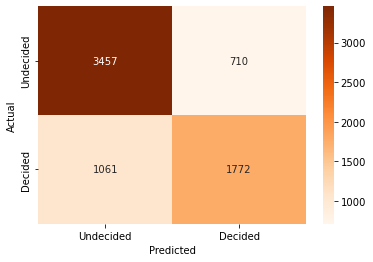

In [17]:
#Confusion matrix
confusion=confusion_matrix(Y_train.astype(float), pred_class)
sns.heatmap(confusion,annot=True,cmap=("Oranges"),
           xticklabels=["Undecided","Decided"],
           yticklabels=["Undecided","Decided"],fmt="0.0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [18]:
#Accuracy, recall, precision
accuracy = round(accuracy_score(Y_train.astype(float), pred_class),2)
recall = round(recall_score(Y_train.astype(float), pred_class),2)
precision = round(precision_score(Y_train.astype(float), pred_class),2)

print("accuracy: ",accuracy)
print("recall: ",recall)
print("precision: ",precision)

accuracy:  0.75
recall:  0.63
precision:  0.71


In [ ]:
#The confusion matrix reveals that the overall accuracy of the training logit model is reasonable (75% accuracy) but not the 
#best. What is recall is sensitivity of the model which is 63%. Precision is above average (71%). All factors considered, the
#model is in the zone of just satisfactory.

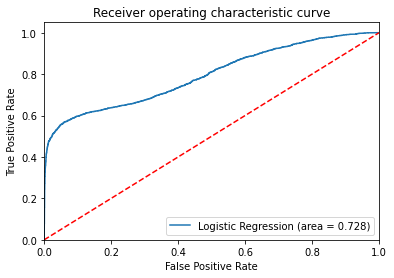

In [19]:
# ROC curve and AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_train.astype(float), pred_class)
fpr, tpr, thresholds = roc_curve(Y_train.astype(float), pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#The ROc Curve is fairly steep and covers are(73%) and appears to separate in a satisfactory manner the 
#true positive from false positive cases.
#**The Model based on training data set appears satisfactory 
#using the six steps approach of the Logistic Regression.

In [20]:
#Compute class from predicted probability
pred_prob=lg.predict(X_test)
pred_class = (pred_prob>0.5).astype(np.int)
pred_class

6252    1
4684    0
1731    1
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    0
Length: 3000, dtype: int32

In [21]:
#Accuracy, recall, precision
accuracy = round(accuracy_score(Y_test.astype(float), pred_class),2)
recall = round(recall_score(Y_test.astype(float), pred_class),2)
precision = round(precision_score(Y_test.astype(float), pred_class),2)

print("accuracy: ",accuracy)
print("recall: ",recall)
print("precision: ",precision)

accuracy:  0.75
recall:  0.61
precision:  0.71


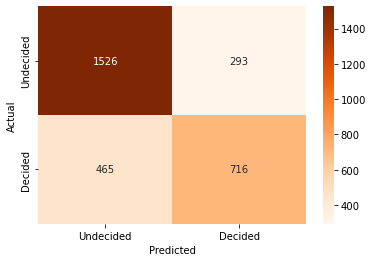

In [22]:
#Confusion matrix
confusion=confusion_matrix(Y_test.astype(float), pred_class)
sns.heatmap(confusion,annot=True,cmap=("Oranges"),
           xticklabels=["Undecided","Decided"],
           yticklabels=["Undecided","Decided"],fmt="0.0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
# The performance of the logistic regression model for the test data based on training data appears good because 
# the test performance has retained the pattern of the training in terms of accuracy, recall and precision